# New Property Development: Washington D.C. Metro Area
This project investigates the best locations to build a luxury condominum development in the D.C. Metro Area. In order to determine the best location for the new development, this research study investigates demographic, property values, and location data from the Foursquare API on twenty cities, neighborhoods, and suburbs in the DC area.


In [1]:
#Load Libraries
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

Import CSV file containing census information and geospatial data on the neighborhoods

In [3]:
# The code was removed by Watson Studio for sharing.

,State,City,MedAge,MedIncome,MedPropValue,Population,Latitude,Longitude
0,MD,Baltimore,35.5,51000,167800,619493,39.2904,-76.6122
1,MD,Columbia,37.7,103707,367600,99615,39.2037,-76.8610
2,MD,Frederick,35.3,67828,255100,71408,39.4143,-77.4105
3,MD,Hagerstown,34.6,40761,148300,40306,39.6418,-77.7200
4,DC,D.C.,33.9,85203,617900,633427,38.9072,-77.0369


In [4]:
dmv_exp = df_data_0 

In [68]:
dmv_exp

,State,City,MedAge,MedIncome,MedPropValue,Population,Latitude,Longitude
0,MD,Baltimore,35.5,51000,167800,619493,39.2904,-76.6122
1,MD,Columbia,37.7,103707,367600,99615,39.2037,-76.8610
2,MD,Frederick,35.3,67828,255100,71408,39.4143,-77.4105
3,MD,Hagerstown,34.6,40761,148300,40306,39.6418,-77.7200
4,DC,D.C.,33.9,85203,617900,633427,38.9072,-77.0369
5,VA,Arlington,34.4,112138,634300,234965,38.8816,-77.0910
6,VA,Alexandria,36.4,93370,537900,144301,38.8048,-77.0469
7,MD,Bethesda,43.4,154559,877300,63374,38.9847,-77.0947
8,VA,Fairfax,39.0,106870,501900,22549,38.8462,-77.3064
9,VA,Manassas,33.5,77551,307000,39300,38.7509,-77.4753


Map of the Area

In [5]:
address = 'Washington, D.C.'
geolocator = Nominatim(user_agent="DC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of DC Metro are {}, {}. '.format(latitude, longitude))

Coordinates of DC Metro are 38.8948932, -77.0365529. 


In [6]:
map_DC = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, city in zip(dmv_exp['Latitude'], dmv_exp['Longitude'], dmv_exp['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_DC)

map_DC

Scatterplot of variabiles Median Income and Median Property Value

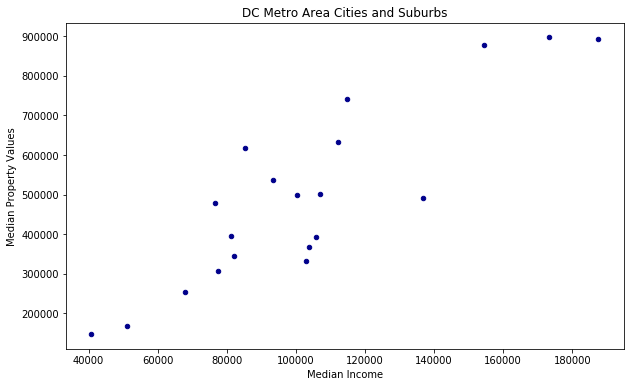

In [130]:
import matplotlib as mpl
import matplotlib.pyplot as plt
dmv_exp.plot(kind='scatter', x='MedIncome', y='MedPropValue', figsize=(10, 6), color='darkblue')



plt.title('DC Metro Area Cities and Suburbs')
plt.xlabel('Median Income')
plt.ylabel('Median Property Values')

plt.show()

Introductory Explorations of Cities: Baltimore and D.C. 

In [11]:
CLIENT_ID = '1JR4XCEU2NTPIM4WWUQCKMM2KQYP2N0ZP1IZ1SFKALSC2EAU'
CLIENT_SECRET = 'LJY0TOAEQ0XFUUQMW2EDKJUSYVVKWNPN1NOKU0LUTCVMUPLS'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1JR4XCEU2NTPIM4WWUQCKMM2KQYP2N0ZP1IZ1SFKALSC2EAU
CLIENT_SECRET:LJY0TOAEQ0XFUUQMW2EDKJUSYVVKWNPN1NOKU0LUTCVMUPLS


In [12]:
#explore Baltimore


Latitude and longitude values of Baltimore are 39.2904, -76.6122.


In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    bmore_latitude, 
    bmore_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1JR4XCEU2NTPIM4WWUQCKMM2KQYP2N0ZP1IZ1SFKALSC2EAU&client_secret=LJY0TOAEQ0XFUUQMW2EDKJUSYVVKWNPN1NOKU0LUTCVMUPLS&v=20180605&ll=39.2904,-76.6122&radius=500&limit=100'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e4015bc6d8c56001b8e6c59'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Baltimore',
  'headerFullLocation': 'Downtown Baltimore, Baltimore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 66,
  'suggestedBounds': {'ne': {'lat': 39.2949000045, 'lng': -76.6063964935499},
   'sw': {'lat': 39.285899995499996, 'lng': -76.61800350645011}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c015f964a52086ef20e3',
       'name': "Larry Flynt's Hustler Club",
       'location': {'address': '409 E Baltimore St',
        'lat': 39.28961547125983,
        'lng': -76.60983330240475,
    

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Larry Flynt's Hustler Club,Strip Club,39.289615,-76.609833
1,Under Armour Performance Center,Clothing Store,39.289126,-76.613973
2,Chez Hugo,French Restaurant,39.289108,-76.611811
3,The Quinntessential Gentleman,Salon / Barbershop,39.288056,-76.612107
4,Halal Food Cart,Food Truck,39.291095,-76.613960


In [19]:
#explore D.C.
dc_latitude = dmv_exp.loc[4, 'Latitude'] # neighborhood latitude value
dc_longitude = dmv_exp.loc[4, 'Longitude'] # neighborhood longitude value

dc_1 = dmv_exp.loc[4, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(dc_1, 
                                                               dc_latitude, 
                                                               dc_longitude))

Latitude and longitude values of D.C. are 38.9072, -77.0369.


In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    dc_latitude, 
    dc_longitude, 
    radius, 
    LIMIT)
url2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1JR4XCEU2NTPIM4WWUQCKMM2KQYP2N0ZP1IZ1SFKALSC2EAU&client_secret=LJY0TOAEQ0XFUUQMW2EDKJUSYVVKWNPN1NOKU0LUTCVMUPLS&v=20180605&ll=38.9072,-77.0369&radius=500&limit=100'

In [21]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5e4016316001fe001b35d13a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Northwest Washington',
  'headerFullLocation': 'Northwest Washington, Washington',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 126,
  'suggestedBounds': {'ne': {'lat': 38.911700004500005,
    'lng': -77.03112795047335},
   'sw': {'lat': 38.9026999955, 'lng': -77.04267204952666}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a931f7bf964a520dd1e20e3',
       'name': 'The Jefferson Hotel',
       'location': {'address': '1200 16th St NW',
        'crossStreet': 'at M St NW',
        'lat': 38.905931557404664,


In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
  
response2 = requests.get(url2).json()
response2

venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,The Jefferson Hotel,Hotel,38.905932,-77.036856
1,National Geographic Society,Museum,38.905190,-77.037259
2,Iron Gate,Mediterranean Restaurant,38.906953,-77.040019
3,Quill,Hotel Bar,38.906073,-77.036857
4,Plume,American Restaurant,38.905900,-77.036630


Explore all the Neighborhoods:

In [24]:
#create a new dataframe called for venues
venues = getNearbyVenues(names=dmv_exp['City'],
                                 latitudes=dmv_exp['Latitude'],
                                 longitudes=dmv_exp['Longitude'])

NameError: name 'getNearbyVenues' is not defined

In [25]:
all_latitude = dmv_exp['Latitude'] # neighborhood latitude value
all_longitude = dmv_exp['Longitude'] # neighborhood longitude value

city = dmv_exp['City'] # neighborhood name


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                    'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
dmv_venues = getNearbyVenues(names=dmv_exp['City'],
                                   latitudes=dmv_exp['Latitude'],
                                   longitudes=dmv_exp['Longitude']
                                  )


Baltimore
Columbia
Frederick
Hagerstown
D.C.
Arlington
Alexandria
Bethesda
Fairfax
Manassas 
Falls Church
Woodbridge
Leesburg
Chevy Chase
Potomac
Rockville
Silver Spring
Olney
Towson
Annapolis


In [28]:
print(dmv_venues.shape)
dmv_venues.head(20)

(983, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Baltimore,39.2904,-76.6122,Larry Flynt's Hustler Club,39.289615,-76.609833,Strip Club
1,Baltimore,39.2904,-76.6122,Under Armour Performance Center,39.289126,-76.613973,Clothing Store
2,Baltimore,39.2904,-76.6122,Chez Hugo,39.289108,-76.611811,French Restaurant
3,Baltimore,39.2904,-76.6122,The Quinntessential Gentleman,39.288056,-76.612107,Salon / Barbershop
4,Baltimore,39.2904,-76.6122,Halal Food Cart,39.291095,-76.613960,Food Truck
5,Baltimore,39.2904,-76.6122,Kimpton Hotel Monaco Baltimore Inner Harbor,39.289793,-76.615647,Hotel
6,Baltimore,39.2904,-76.6122,Hotel RL Baltimore Inner Harbor,39.288828,-76.611903,Hotel
7,Baltimore,39.2904,-76.6122,Ida B's Table,39.292654,-76.610420,Southern / Soul Food Restaurant
8,Baltimore,39.2904,-76.6122,Baltimore Farmers' Market & Bazaar,39.293297,-76.610490,Farmers Market
9,Baltimore,39.2904,-76.6122,Chesapeake Shakespeare Company Downtown Theater,39.288970,-76.612150,Theater


In [96]:
dmv_venues.tail()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
978,Annapolis,38.9784,-76.4922,Sir Speedy,38.978214,-76.497143,Paper / Office Supplies Store
979,Annapolis,38.9784,-76.4922,Caffe Pronto Espresso Bar,38.977950,-76.497713,Food
980,Annapolis,38.9784,-76.4922,The Weather Rail Sports Bar,38.978095,-76.497827,Hotel Bar
981,Annapolis,38.9784,-76.4922,SECU Credit Union,38.977643,-76.497787,Credit Union
982,Annapolis,38.9784,-76.4922,Chesapeake Brew Pub,38.977965,-76.497615,Comfort Food Restaurant


In [29]:
#Number of Venues returned for each city
dmv_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Alexandria,100,100,100,100,100,100
Annapolis,74,74,74,74,74,74
Arlington,33,33,33,33,33,33
Baltimore,66,66,66,66,66,66
Bethesda,100,100,100,100,100,100
Chevy Chase,12,12,12,12,12,12
Columbia,3,3,3,3,3,3
D.C.,100,100,100,100,100,100
Fairfax,40,40,40,40,40,40


In [98]:
print('There are {} uniques categories.'.format(len(dmv_venues['Venue Category'].unique())))

There are 210 uniques categories.


In [30]:
# one hot encoding
dmv_onehot = pd.get_dummies(dmv_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dmv_onehot['City'] = dmv_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [dmv_onehot.columns[-1]] + list(dmv_onehot.columns[:-1])
dmv_onehot = dmv_onehot[fixed_columns]

dmv_onehot.head()

,City,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Iraqi Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Non-Profit,Noodle House,Office,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Baltimore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baltimore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baltimore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
#Frequency of different venue types in each neighboorhood
dmv_grouped = dmv_onehot.groupby('City').mean().reset_index()
dmv_grouped

,City,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Credit Union,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Iraqi Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorsports Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Non-Profit,Noodle House,Office,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alexandria,0.000000,0.050000,0.010000,0.00,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.030000,0.000000,0.000000,0.000000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.030000,0.00,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.00,0.000000,0.020000,0.000000,0.020000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.01,0.020000,0.020000,0.000000,0.010000,0.000000,0.020000,0.000000,0.00,0.000000,0.000,0.010000,0.030000,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,

In [33]:
#frequency for the top 5 venue types in each city
num_top_venues = 5

for hood in dmv_grouped['City']:
    print("----"+hood+"----")
    temp = dmv_grouped[dmv_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alexandria----
                 venue  freq
0  American Restaurant  0.05
1                  Spa  0.04
2             Boutique  0.03
3          Coffee Shop  0.03
4       Clothing Store  0.03


----Annapolis----
            venue  freq
0             Bar  0.09
1     Coffee Shop  0.05
2  Sandwich Place  0.05
3   Historic Site  0.04
4             Pub  0.04


----Arlington----
                venue  freq
0                Café  0.06
1   Convenience Store  0.06
2                Park  0.06
3          Food Truck  0.03
4  Chinese Restaurant  0.03


----Baltimore----
                 venue  freq
0          Coffee Shop  0.08
1  American Restaurant  0.06
2           Food Truck  0.06
3       Clothing Store  0.05
4                Hotel  0.05


----Bethesda----
                 venue  freq
0          Coffee Shop  0.05
1        Deli / Bodega  0.04
2       Sandwich Place  0.03
3    French Restaurant  0.03
4  American Restaurant  0.03


----Chevy Chase----
            venue  freq
0  Sandwich Place  0.1

Most Common Venues for Each City/Neighborhood

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = dmv_grouped['City']

for ind in np.arange(dmv_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dmv_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,American Restaurant,Spa,Italian Restaurant,Clothing Store,Coffee Shop,French Restaurant,Boutique,Cajun / Creole Restaurant,Café,Cupcake Shop
1,Annapolis,Bar,Sandwich Place,Coffee Shop,Pub,Historic Site,Gift Shop,Restaurant,Mexican Restaurant,Ice Cream Shop,Hotel
2,Arlington,Park,Café,Convenience Store,Korean Restaurant,Spa,Liquor Store,South American Restaurant,Gas Station,Mediterranean Restaurant,Chinese Restaurant
3,Baltimore,Coffee Shop,American Restaurant,Food Truck,Hotel,Clothing Store,Gym / Fitness Center,Lounge,Pizza Place,Café,Piano Bar
4,Bethesda,Coffee Shop,Deli / Bodega,Spa,Juice Bar,American Restaurant,Seafood Restaurant,Bakery,Sandwich Place,French Restaurant,Pizza Place


In [36]:
city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,American Restaurant,Spa,Italian Restaurant,Clothing Store,Coffee Shop,French Restaurant,Boutique,Cajun / Creole Restaurant,Café,Cupcake Shop
1,Annapolis,Bar,Sandwich Place,Coffee Shop,Pub,Historic Site,Gift Shop,Restaurant,Mexican Restaurant,Ice Cream Shop,Hotel
2,Arlington,Park,Café,Convenience Store,Korean Restaurant,Spa,Liquor Store,South American Restaurant,Gas Station,Mediterranean Restaurant,Chinese Restaurant
3,Baltimore,Coffee Shop,American Restaurant,Food Truck,Hotel,Clothing Store,Gym / Fitness Center,Lounge,Pizza Place,Café,Piano Bar
4,Bethesda,Coffee Shop,Deli / Bodega,Spa,Juice Bar,American Restaurant,Seafood Restaurant,Bakery,Sandwich Place,French Restaurant,Pizza Place
5,Chevy Chase,Sandwich Place,Bank,Electronics Store,Shoe Store,Shoe Repair,Shipping Store,Locksmith,Grocery Store,Yoga Studio,Park
6,Columbia,Business Service,Photography Studio,Performing Arts Venue,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Food Court
7,D.C.,Hotel,American Restaurant,Hotel Bar,Coffee Shop,Salad Place,Thai Restaurant,Sushi Restaurant,Sandwich Place,Gay Bar,Café
8,Fairfax,Pizza Place,Yoga Studio,Smoothie Shop,Restaurant,Record Shop,Pub,Pharmacy,Park,Noodle House,New American Restaurant
9,Falls Church,Bar,Italian Restaurant,Grocery Store,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Music Venue,Deli / Bodega,Cajun / Creole Restaurant,Caribbean Restaurant


In [54]:
# set number of clusters
kclusters = 10

dmv_grouped_clustering = dmv_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dmv_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 8, 0, 0, 2, 1, 0, 0, 0], dtype=int32)

In [55]:
# add clustering labels
city_venues_sorted.insert(0, '10Clusters', kmeans.labels_)

dmv_merged = dmv_exp

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dmv_merged = dmv_merged.join(city_venues_sorted.set_index('City'), on='City')

dmv_merged # check the last columns!

,State,City,MedAge,MedIncome,MedPropValue,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MD,Baltimore,35.5,51000,167800,619493,39.2904,-76.6122,0,0,1,Coffee Shop,American Restaurant,Food Truck,Hotel,Clothing Store,Gym / Fitness Center,Lounge,Pizza Place,Café,Piano Bar
1,MD,Columbia,37.7,103707,367600,99615,39.2037,-76.8610,1,1,2,Business Service,Photography Studio,Performing Arts Venue,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Food Court
2,MD,Frederick,35.3,67828,255100,71408,39.4143,-77.4105,0,0,1,American Restaurant,Park,Coffee Shop,Art Gallery,Bar,Pub,Italian Restaurant,Restaurant,Gastropub,Furniture / Home Store
3,MD,Hagerstown,34.6,40761,148300,40306,39.6418,-77.7200,3,2,3,Theater,American Restaurant,Bus Station,Pizza Place,Convenience Store,Farmers Market,Sandwich Place,Science Museum,Coffee Shop,Mexican Restaurant
4,DC,D.C.,33.9,85203,617900,633427,38.9072,-77.0369,0,0,1,Hotel,American Restaurant,Hotel Bar,Coffee Shop,Salad Place,Thai Restaurant,Sushi Restaurant,Sandwich Place,Gay Bar,Café
5,VA,Arlington,34.4,112138,634300,234965,38.8816,-77.0910,8,0,8,Park,Café,Convenience Store,Korean Restaurant,Spa,Liquor Store,South American Restaurant,Gas Station,Mediterranean Restaurant,Chinese Restaurant
6,VA,Alexandria,36.4,93370,537900,144301,38.8048,-77.0469,0,0,1,American Restaurant,Spa,Italian Restaurant,Clothing Store,Coffee Shop,French Restaurant,Boutique,Cajun / Creole Restaurant,Café,Cupcake Shop
7,MD,Bethesda,43.4,154559,877300,63374,38.9847,-77.0947,0,0,1,Coffee Shop,Deli / Bodega,Spa,Juice Bar,American Restaurant,Seafood Restaurant,Bakery,Sandwich Place,French Restaurant,Pizza Place
8,VA,Fairfax,39.0,106870,501900,22549,38.8462,-77.3064,0,0,1,Pizza Place,Yoga Studio,Smoothie Shop,Restaurant,Record Shop,Pub,Pharmacy,Park,Noodle House,New American Restaurant
9,VA,Manassas,33.5,77551,307000,39300,38.7509,-77.4753,7,6,7,Coffee Shop,American Restaurant,Brewery,Mexican Restaurant,Bar,Convenience Store,Bookstore,Restaurant,Sandwich Place,Thai Restaurant


In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dmv_merged['Latitude'], dmv_merged['Longitude'], dmv_merged['City'], dmv_merged['10Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine the Clusters

In [57]:
#examine clusters

dmv_merged.loc[dmv_merged['10Clusters'] == 0, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baltimore,619493,39.2904,-76.6122,0,0,1,Coffee Shop,American Restaurant,Food Truck,Hotel,Clothing Store,Gym / Fitness Center,Lounge,Pizza Place,Café,Piano Bar
2,Frederick,71408,39.4143,-77.4105,0,0,1,American Restaurant,Park,Coffee Shop,Art Gallery,Bar,Pub,Italian Restaurant,Restaurant,Gastropub,Furniture / Home Store
4,D.C.,633427,38.9072,-77.0369,0,0,1,Hotel,American Restaurant,Hotel Bar,Coffee Shop,Salad Place,Thai Restaurant,Sushi Restaurant,Sandwich Place,Gay Bar,Café
6,Alexandria,144301,38.8048,-77.0469,0,0,1,American Restaurant,Spa,Italian Restaurant,Clothing Store,Coffee Shop,French Restaurant,Boutique,Cajun / Creole Restaurant,Café,Cupcake Shop
7,Bethesda,63374,38.9847,-77.0947,0,0,1,Coffee Shop,Deli / Bodega,Spa,Juice Bar,American Restaurant,Seafood Restaurant,Bakery,Sandwich Place,French Restaurant,Pizza Place
8,Fairfax,22549,38.8462,-77.3064,0,0,1,Pizza Place,Yoga Studio,Smoothie Shop,Restaurant,Record Shop,Pub,Pharmacy,Park,Noodle House,New American Restaurant
10,Falls Church,12751,38.8823,-77.1711,0,0,1,Bar,Italian Restaurant,Grocery Store,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Music Venue,Deli / Bodega,Cajun / Creole Restaurant,Caribbean Restaurant
15,Rockville,68401,39.0840,-77.1528,0,0,1,Bakery,Ice Cream Shop,Coffee Shop,Salon / Barbershop,Bubble Tea Shop,Shopping Plaza,Sandwich Place,Indian Restaurant,Lawyer,Middle Eastern Restaurant
18,Towson,55197,39.4015,-76.6019,0,0,1,Cosmetics Shop,American Restaurant,Pizza Place,Café,Jewelry Store,Chinese Restaurant,Clothing Store,Coffee Shop,Sushi Restaurant,Bar
19,Annapolis,39321,38.9784,-76.4922,0,0,1,Bar,Sandwich Place,Coffee Shop,Pub,Historic Site,Gift Shop,Restaurant,Mexican Restaurant,Ice Cream Shop,Hotel


In [58]:
dmv_merged.loc[dmv_merged['10Clusters'] == 1, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Columbia,99615,39.2037,-76.861,1,1,2,Business Service,Photography Studio,Performing Arts Venue,Yoga Studio,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Food Court


In [59]:
dmv_merged.loc[dmv_merged['10Clusters'] == 2, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Chevy Chase,9381,38.9693,-77.0789,2,3,0,Sandwich Place,Bank,Electronics Store,Shoe Store,Shoe Repair,Shipping Store,Locksmith,Grocery Store,Yoga Studio,Park


In [60]:
dmv_merged.loc[dmv_merged['10Clusters'] == 3, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Hagerstown,40306,39.6418,-77.72,3,2,3,Theater,American Restaurant,Bus Station,Pizza Place,Convenience Store,Farmers Market,Sandwich Place,Science Museum,Coffee Shop,Mexican Restaurant


In [61]:
dmv_merged.loc[dmv_merged['10Clusters'] == 4, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Woodbridge,54275,38.6582,-77.2497,4,4,4,Pizza Place,Sandwich Place,Ice Cream Shop,Thrift / Vintage Store,Dance Studio,Donut Shop,Fast Food Restaurant,Clothing Store,Motel,Spa


In [62]:
dmv_merged.loc[dmv_merged['10Clusters'] == 5, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Leesburg,54215,39.1157,-77.5636,5,0,5,Brewery,American Restaurant,Chinese Restaurant,Sandwich Place,Café,Bakery,Seafood Restaurant,Mexican Restaurant,Frozen Yogurt Shop,Coffee Shop


In [63]:
dmv_merged.loc[dmv_merged['10Clusters'] == 6, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Silver Spring,71452,38.9907,-77.0261,6,5,6,Asian Restaurant,Coffee Shop,Brewery,Hotel,Greek Restaurant,Mexican Restaurant,Salad Place,Café,Caribbean Restaurant,Sandwich Place


In [64]:
dmv_merged.loc[dmv_merged['10Clusters'] == 7, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Manassas,39300,38.7509,-77.4753,7,6,7,Coffee Shop,American Restaurant,Brewery,Mexican Restaurant,Bar,Convenience Store,Bookstore,Restaurant,Sandwich Place,Thai Restaurant


In [65]:
dmv_merged.loc[dmv_merged['10Clusters'] == 8, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Arlington,234965,38.8816,-77.091,8,0,8,Park,Café,Convenience Store,Korean Restaurant,Spa,Liquor Store,South American Restaurant,Gas Station,Mediterranean Restaurant,Chinese Restaurant


In [66]:
dmv_merged.loc[dmv_merged['10Clusters'] == 9, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Potomac,44865,39.0182,-77.2086,9,0,1,Bank,Grocery Store,Drugstore,Health & Beauty Service,Restaurant,Pub,Pizza Place,New American Restaurant,Neighborhood,Mobile Phone Shop
17,Olney,33844,39.1532,-77.0669,9,0,1,Ice Cream Shop,Sandwich Place,Italian Restaurant,Mexican Restaurant,Pizza Place,Bank,Grocery Store,Latin American Restaurant,Donut Shop,Pet Store


In [67]:
dmv_merged.loc[dmv_merged['10Clusters'] == 10, dmv_merged.columns[[1] + list(range(5, dmv_merged.shape[1]))]]

,City,Population,Latitude,Longitude,10Clusters,7Clusters,9Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## Final City Selection: Fairfax

In [93]:
ax_latitude = dmv_exp.loc[8, 'Latitude'] # neighborhood latitude value
ax_longitude = dmv_exp.loc[8, 'Longitude'] # neighborhood longitude value

ax_1 = dmv_exp.loc[8, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(ax_1, 
                                                               ax_latitude, 
                                                               ax_longitude))

Latitude and longitude values of Fairfax are 38.8462, -77.3064.


In [94]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ax_latitude, 
    ax_longitude, 
    radius, 
    LIMIT)
url2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1JR4XCEU2NTPIM4WWUQCKMM2KQYP2N0ZP1IZ1SFKALSC2EAU&client_secret=LJY0TOAEQ0XFUUQMW2EDKJUSYVVKWNPN1NOKU0LUTCVMUPLS&v=20180605&ll=38.8462,-77.3064&radius=500&limit=100'

In [95]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5e4022580f5968001b51f0fa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Fairfax',
  'headerFullLocation': 'Fairfax',
  'headerLocationGranularity': 'city',
  'totalResults': 40,
  'suggestedBounds': {'ne': {'lat': 38.850700004500005,
    'lng': -77.30063290278899},
   'sw': {'lat': 38.8416999955, 'lng': -77.312167097211}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53fcce77498e1c681f8153d4',
       'name': 'De Clieu Coffee',
       'location': {'address': '10389 Main St # B',
        'crossStreet': 'university Dr',
        'lat': 38.845818,
        'lng': -77.305153,
        'labeledLatLngs': [{'l

In [96]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [97]:
  
response2 = requests.get(url2).json()
response2

venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,De Clieu Coffee,Café,38.845818,-77.305153
1,Mobius Records,Record Shop,38.845888,-77.305232
2,The Wine House,Wine Bar,38.847225,-77.305611
3,Bollywood Bistro,Indian Restaurant,38.847198,-77.305692
4,Havabite Eatery Family Restaurant,Greek Restaurant,38.846174,-77.306065
